In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from scenedataset.scenedataset import SceneDataset

In [16]:
dataset = SceneDataset(paths = ["/SceneDataset/data/02.mkv"], show_progress=True)

2023-02-06 20:01:13.124 | INFO     | scenedataset.scenedataset:_get_video_paths:422 - Found 1 videos


In [6]:
from torchvision.utils import make_grid

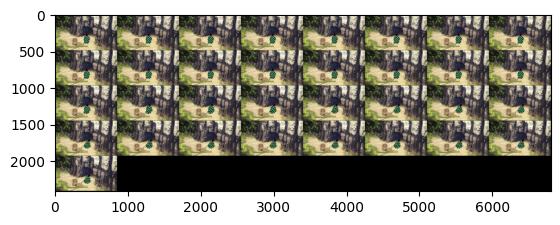

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(make_grid(dataset[10].permute((0, 3, 1, 2))).permute((1, 2, 0)))


In [42]:
!pip install pytorch-ignite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.1/264.1 kB 10.1 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip


In [36]:
from torchmetrics import (
    MeanAbsoluteError,
    MeanSquaredError,
    StructuralSimilarityIndexMeasure,
)
mae = MeanAbsoluteError()
mse = MeanSquaredError()
ssim = StructuralSimilarityIndexMeasure()

In [56]:
from ignite.metrics import SSIM, MeanSquaredError

In [57]:
# ssim = SSIM(data_range=1.0)
ssim = MeanSquaredError()

In [63]:
frames = dataset[10]    
frames = frames.permute(0, 3, 1, 2)
frames = frames.float() / 255.0

i = 0
current_frame = frames[i : i + 1]
next_frame = frames[i + 1 : i + 2]

In [64]:

from ignite.engine import *

def eval_step(engine, batch):
    return batch

default_evaluator = Engine(eval_step)

ssim.attach(default_evaluator, 'ssim')

# state = default_evaluator.run([[torch.zeros((1, 3, 100, 100)), torch.zeros((1, 3, 100, 100))]])
# ssim(torch.rand((1, 3, 256, 512)), torch.rand((1, 3, 256, 512)))
# ssim(current_frame, next_frame)
state = default_evaluator.run([[current_frame, next_frame]])
state.metrics['ssim']

0.7870973348617554

In [76]:
broken_dataset = SceneDataset(paths = ["/SceneDataset/data/02.mkv"], show_progress=True, min_max_len=(15, 25), duplicate_threshold=0.1, duplicate_method="ssim")

2023-02-06 20:46:22.017 | INFO     | scenedataset.scenedataset:_get_video_paths:443 - Found 1 videos
2023-02-06 20:46:22.026 | INFO     | scenedataset.scenedataset:retrieve_scenes_from_video:235 - Removing duplicate scenes...


Loading scenes to find duplicates...:   0%|          | 0/25 [00:00<?, ?it/s]

Loading scenes to find duplicates...:   0%|          | 0/54 [00:00<?, ?it/s]

In [ ]:
len(broken_dataset)

In [ ]:
len(broken_dataset)

1681

In [ ]:
from scenedataset.scenedataset import Scene

In [ ]:
scene = Scene(15, 40, "")

In [ ]:
for s in broken_dataset.cut_scene(scene, 15):
    print(s)

Scene(15, 40, )


In [ ]:
broken_dataset.get_value_to_split(scene, 16, 25)

24